In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np



In [42]:
df_train= pd.read_csv("/kaggle/input/playground-series-s5e11/train.csv")
df_test= pd.read_csv("/kaggle/input/playground-series-s5e11/test.csv")

In [43]:
df_train.tail()

,id,annual_income,debt_to_income_ratio,credit_score,loan_amount,interest_rate,gender,marital_status,education_level,employment_status,loan_purpose,grade_subgrade,loan_paid_back
593989,593989,23004.26,0.152,703,20958.37,10.92,Female,Single,High School,Employed,Business,C3,1.0
593990,593990,35289.43,0.105,559,3257.24,14.62,Male,Single,Bachelor's,Employed,Debt consolidation,F5,1.0
593991,593991,47112.64,0.072,675,929.27,14.13,Female,Married,Bachelor's,Employed,Debt consolidation,C1,1.0
593992,593992,76748.44,0.067,740,16290.40,9.87,Male,Single,Bachelor's,Employed,Debt consolidation,B2,1.0
593993,593993,48959.52,0.096,752,7707.73,10.31,Male,Married,High School,Employed,Education,B3,1.0


In [44]:


missing_count = df_train.isnull().sum()
print(missing_count)
missing_count = df_test.isnull().sum()
print(missing_count)


id                      0
annual_income           0
debt_to_income_ratio    0
credit_score            0
loan_amount             0
interest_rate           0
gender                  0
marital_status          0
education_level         0
employment_status       0
loan_purpose            0
grade_subgrade          0
loan_paid_back          0
dtype: int64
id                      0
annual_income           0
debt_to_income_ratio    0
credit_score            0
loan_amount             0
interest_rate           0
gender                  0
marital_status          0
education_level         0
employment_status       0
loan_purpose            0
grade_subgrade          0
dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

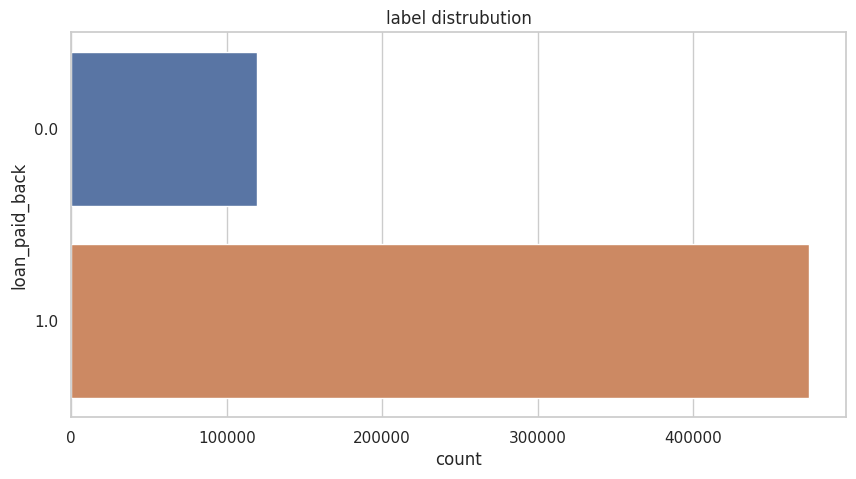

In [45]:
plt.figure(figsize=(10,5))
sns.countplot(y=df_train['loan_paid_back'])
plt.title('label distrubution')
plt.show

Sayısal Sütunlar: 5
Kategorik Sütunlar: 6


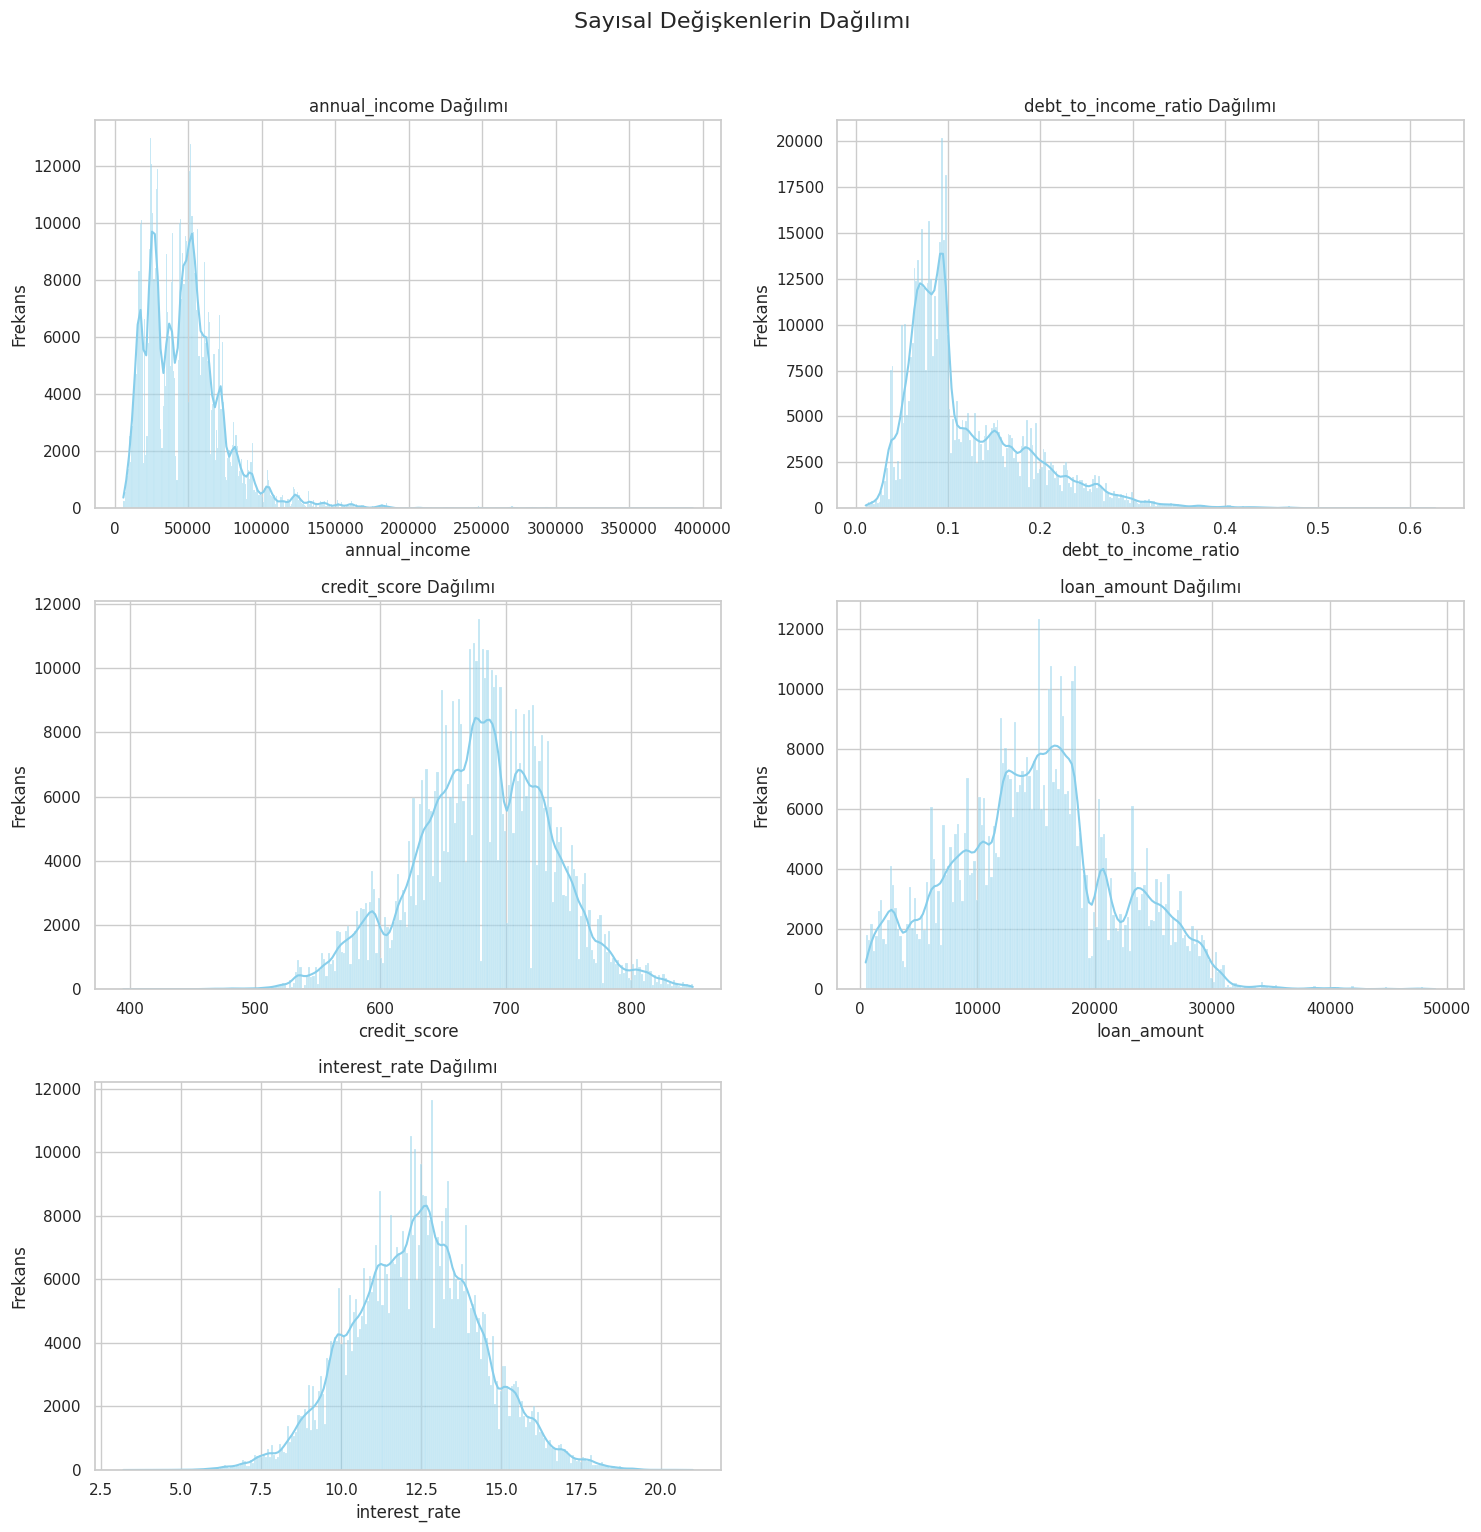

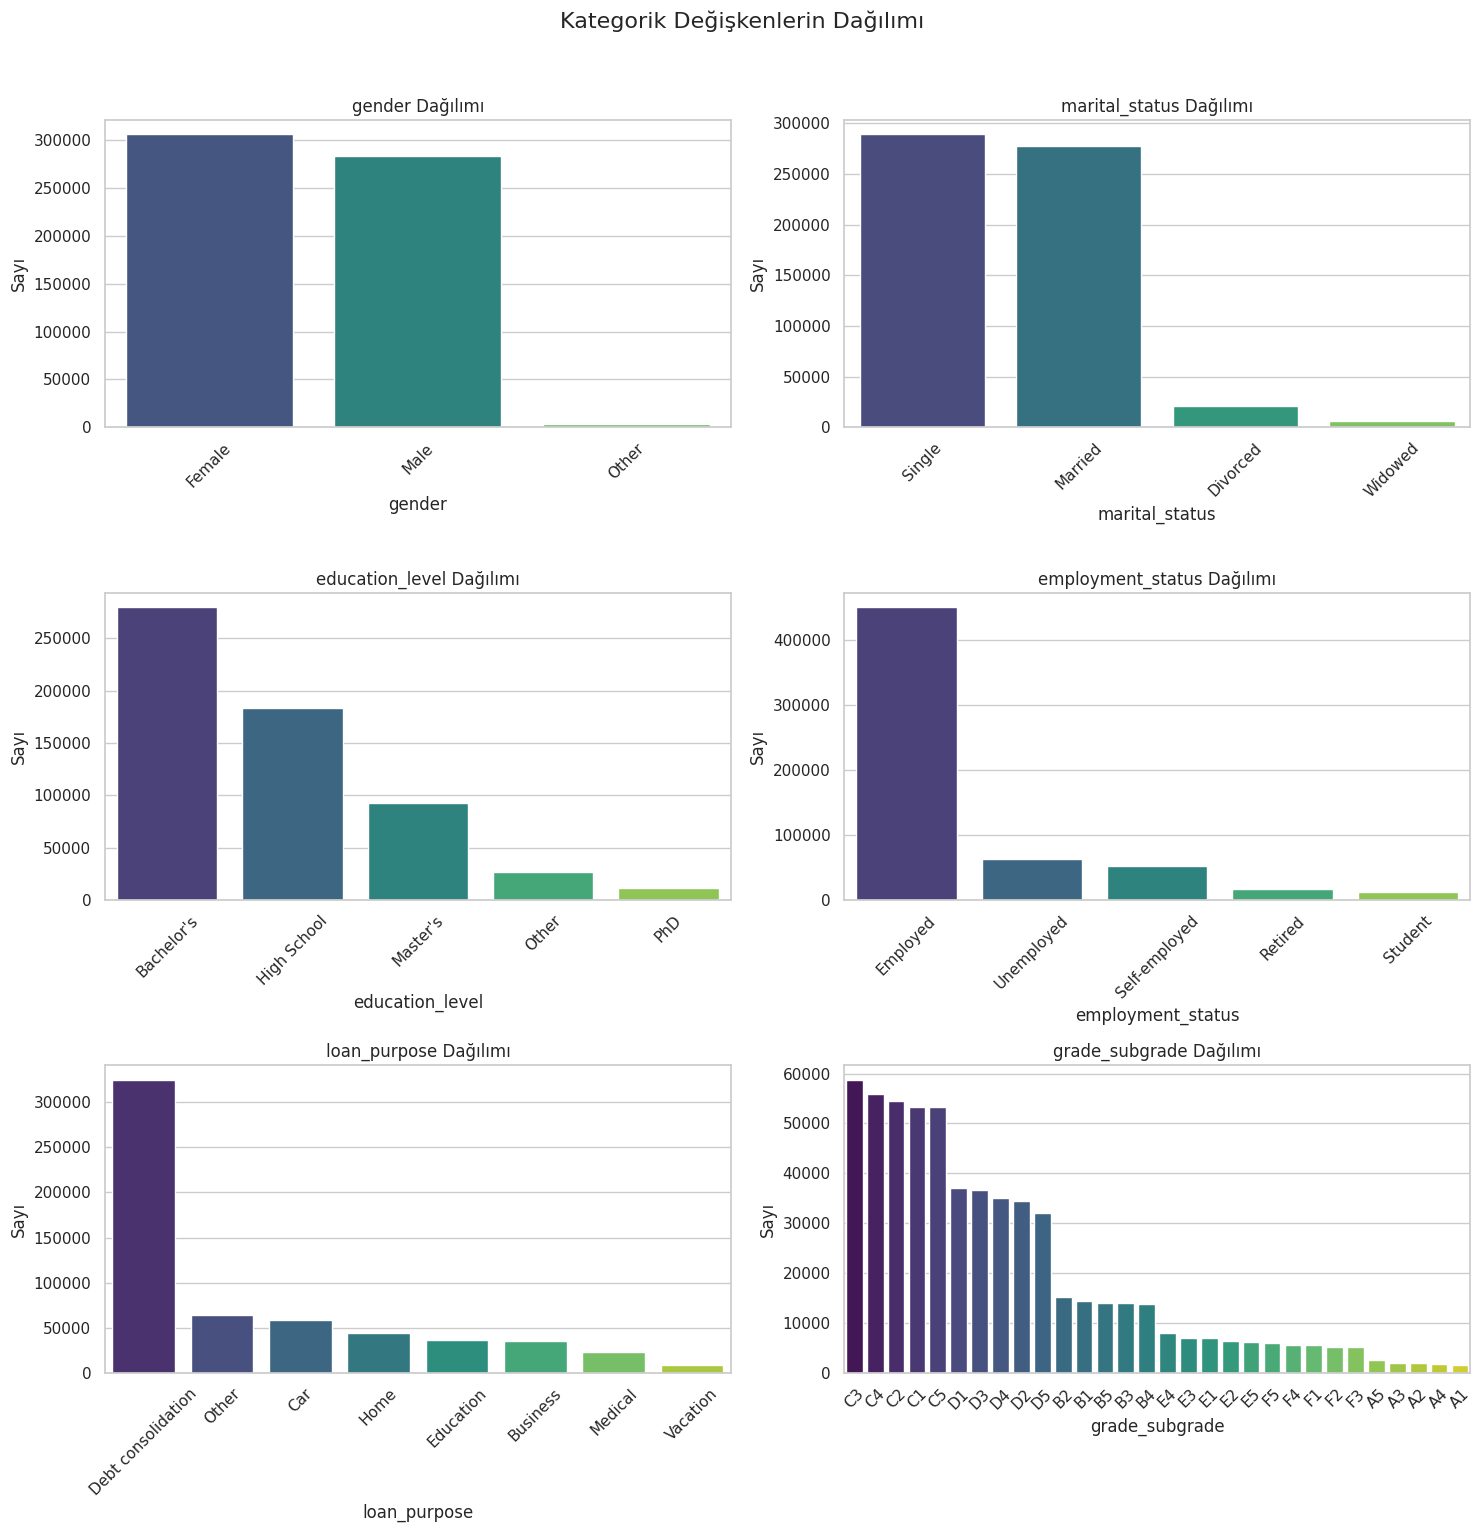

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

import warnings

warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn")

# Görselleştirme ayarları (Estetik ve okunabilirlik için)
sns.set(style="whitegrid")

def visualize_distributions(df):
    df = df.copy()
    
    # 'number' diyerek int ve float tiplerini alıyoruz.
    numeric_cols = df.select_dtypes(include=['number']).columns.tolist()
    
    # 'object' ve 'category' tiplerini alıyoruz.
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
    
    print(f"Sayısal Sütunlar: {len(numeric_cols)}")
    print(f"Kategorik Sütunlar: {len(categorical_cols)}")
    
    # 2. Sayısal Sütunların Görselleştirilmesi (Histogram + KDE)
    if numeric_cols:
        n_cols = 2  # Yan yana kaç grafik olsun
        n_rows = math.ceil(len(numeric_cols) / n_cols)
        
        plt.figure(figsize=(15, 5 * n_rows))
        plt.suptitle("Sayısal Değişkenlerin Dağılımı", fontsize=16, y=1.02)
        
        for i, col in enumerate(numeric_cols):
            plt.subplot(n_rows, n_cols, i + 1)
            
            # KDE (Kernel Density Estimate) dağılımın şeklini yumuşatarak görmemizi sağlar.
            # bins='auto' ile histogram çubuk sayısını veriye göre optimize ederiz.
            sns.histplot(df[col], kde=True, bins='auto', color='skyblue')
            
            plt.title(f'{col} Dağılımı')
            plt.xlabel(col)
            plt.ylabel('Frekans')
            
        plt.tight_layout()
        plt.show()
    
    # 3. Kategorik Sütunların Görselleştirilmesi (Bar Chart / Count Plot)
    if categorical_cols:
        # Kategorik verilerde unique değer sayısı çok fazlaysa (örn: ID sütunu) grafiği çizdirmemek mantıklıdır.
        # Burada eşik değerini (threshold) 50 olarak belirledim.
        unique_threshold = 50
        cols_to_plot = [col for col in categorical_cols if df[col].nunique() <= unique_threshold]
        
        if cols_to_plot:
            n_cols = 2
            n_rows = math.ceil(len(cols_to_plot) / n_cols)
            
            plt.figure(figsize=(15, 5 * n_rows))
            plt.suptitle("Kategorik Değişkenlerin Dağılımı", fontsize=16, y=1.02)
            
            for i, col in enumerate(cols_to_plot):
                plt.subplot(n_rows, n_cols, i + 1)
                
                # Kategorik verilerin frekansını çubuk grafik olarak gösteriyoruz.
                # order= ile en çok geçenden en aza doğru sıralamak okunabilirliği artırır.
                sns.countplot(x=col, data=df, order=df[col].value_counts().index, palette='viridis')
                
                plt.title(f'{col} Dağılımı')
                plt.xlabel(col)
                plt.ylabel('Sayı')
                plt.xticks(rotation=45) # Etiketler uzunsa birbirine girmesin diye çeviriyoruz
                
            plt.tight_layout()
            plt.show()
        else:
            print("\nKategorik sütunların hepsi çok fazla unique değere sahip (cardinality yüksek), çizilmedi.")

# Fonksiyonu çalıştır
visualize_distributions(df_train.drop(columns=['id','loan_paid_back']))

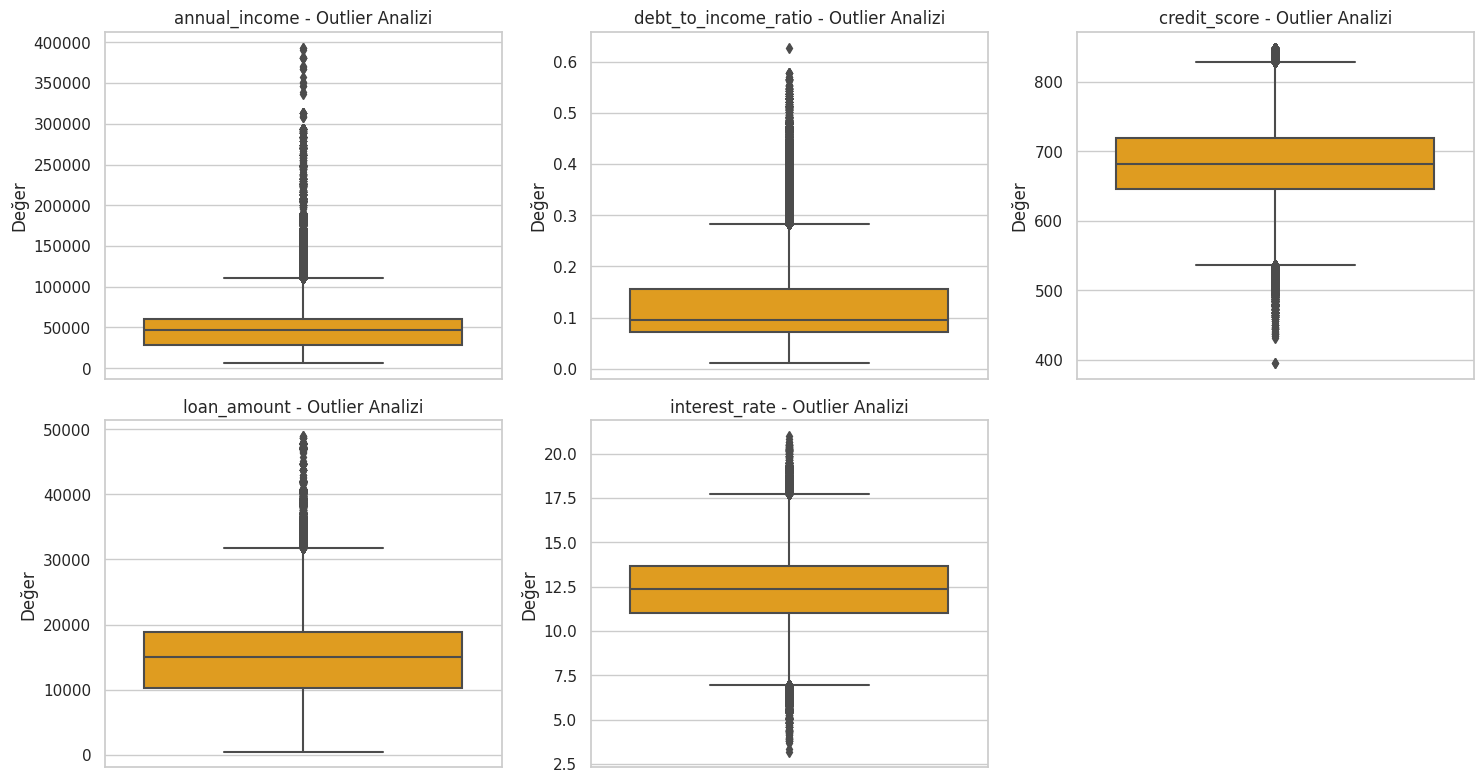

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt
import math

# Sayısal sütunları seçelim
numeric_cols = df_train.select_dtypes(include=['number']).columns.tolist()

# ID veya Target (loan_paid_back) gibi sütunları aykırı değer analizinden çıkarabiliriz
cols_to_plot = [col for col in numeric_cols if col not in ['id', 'loan_paid_back']]

# Grid yapısını kuralım
n_cols = 3  # Yan yana 3 grafik
n_rows = math.ceil(len(cols_to_plot) / n_cols)

plt.figure(figsize=(15, 4 * n_rows))

for i, col in enumerate(cols_to_plot):
    plt.subplot(n_rows, n_cols, i+1)
    
    # Boxplot çizimi
    # x=df_train[col] diyerek yatay, y=... diyerek dikey çizebilirsiniz. 
    # Dikey genelde outlierları görmek için daha rahattır.
    sns.boxplot(y=df_train[col], color='orange')
    
    plt.title(f'{col} - Outlier Analizi')
    plt.ylabel('Değer')

plt.tight_layout()
plt.show()

In [48]:
!pip install plotly

Sayısal Sütunlar: 6
Kategorik Sütunlar: 6


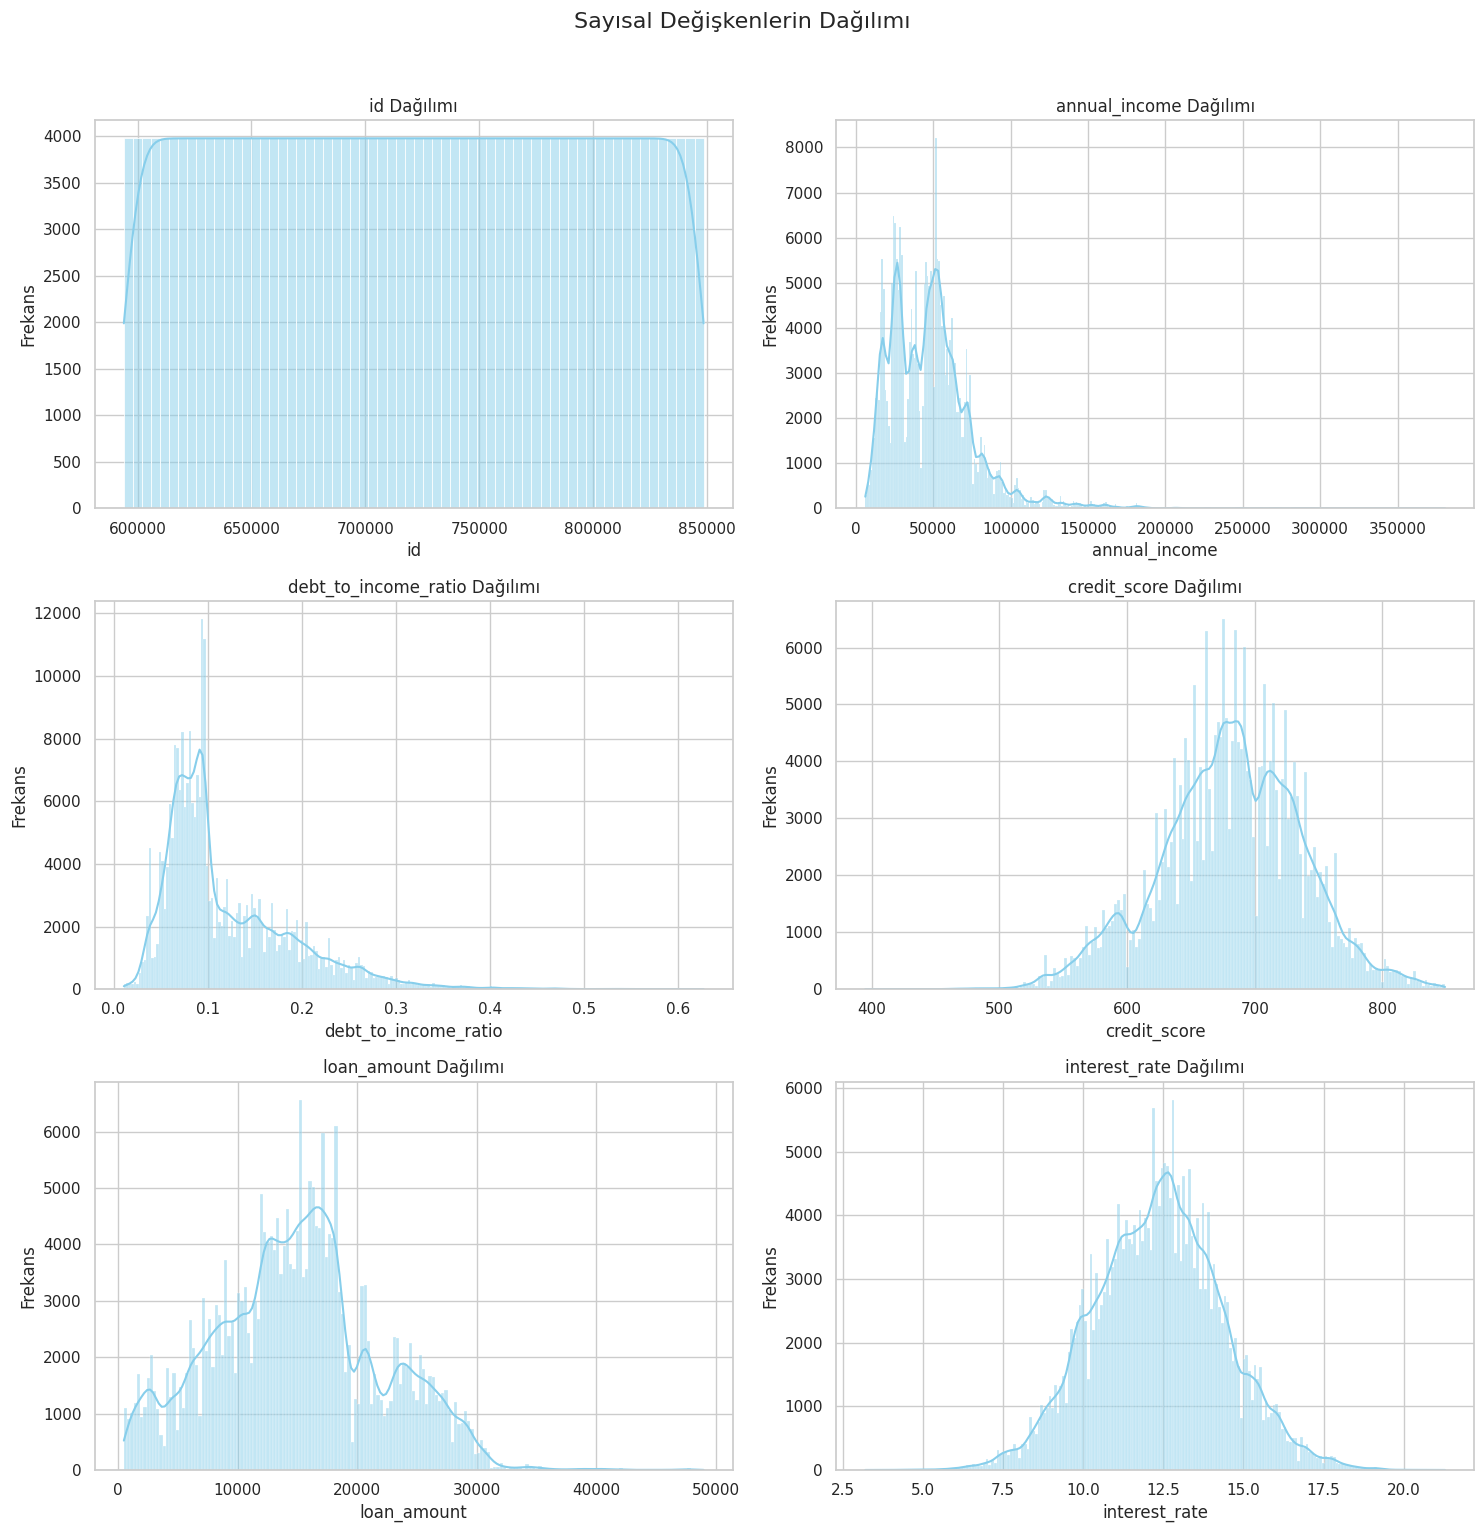

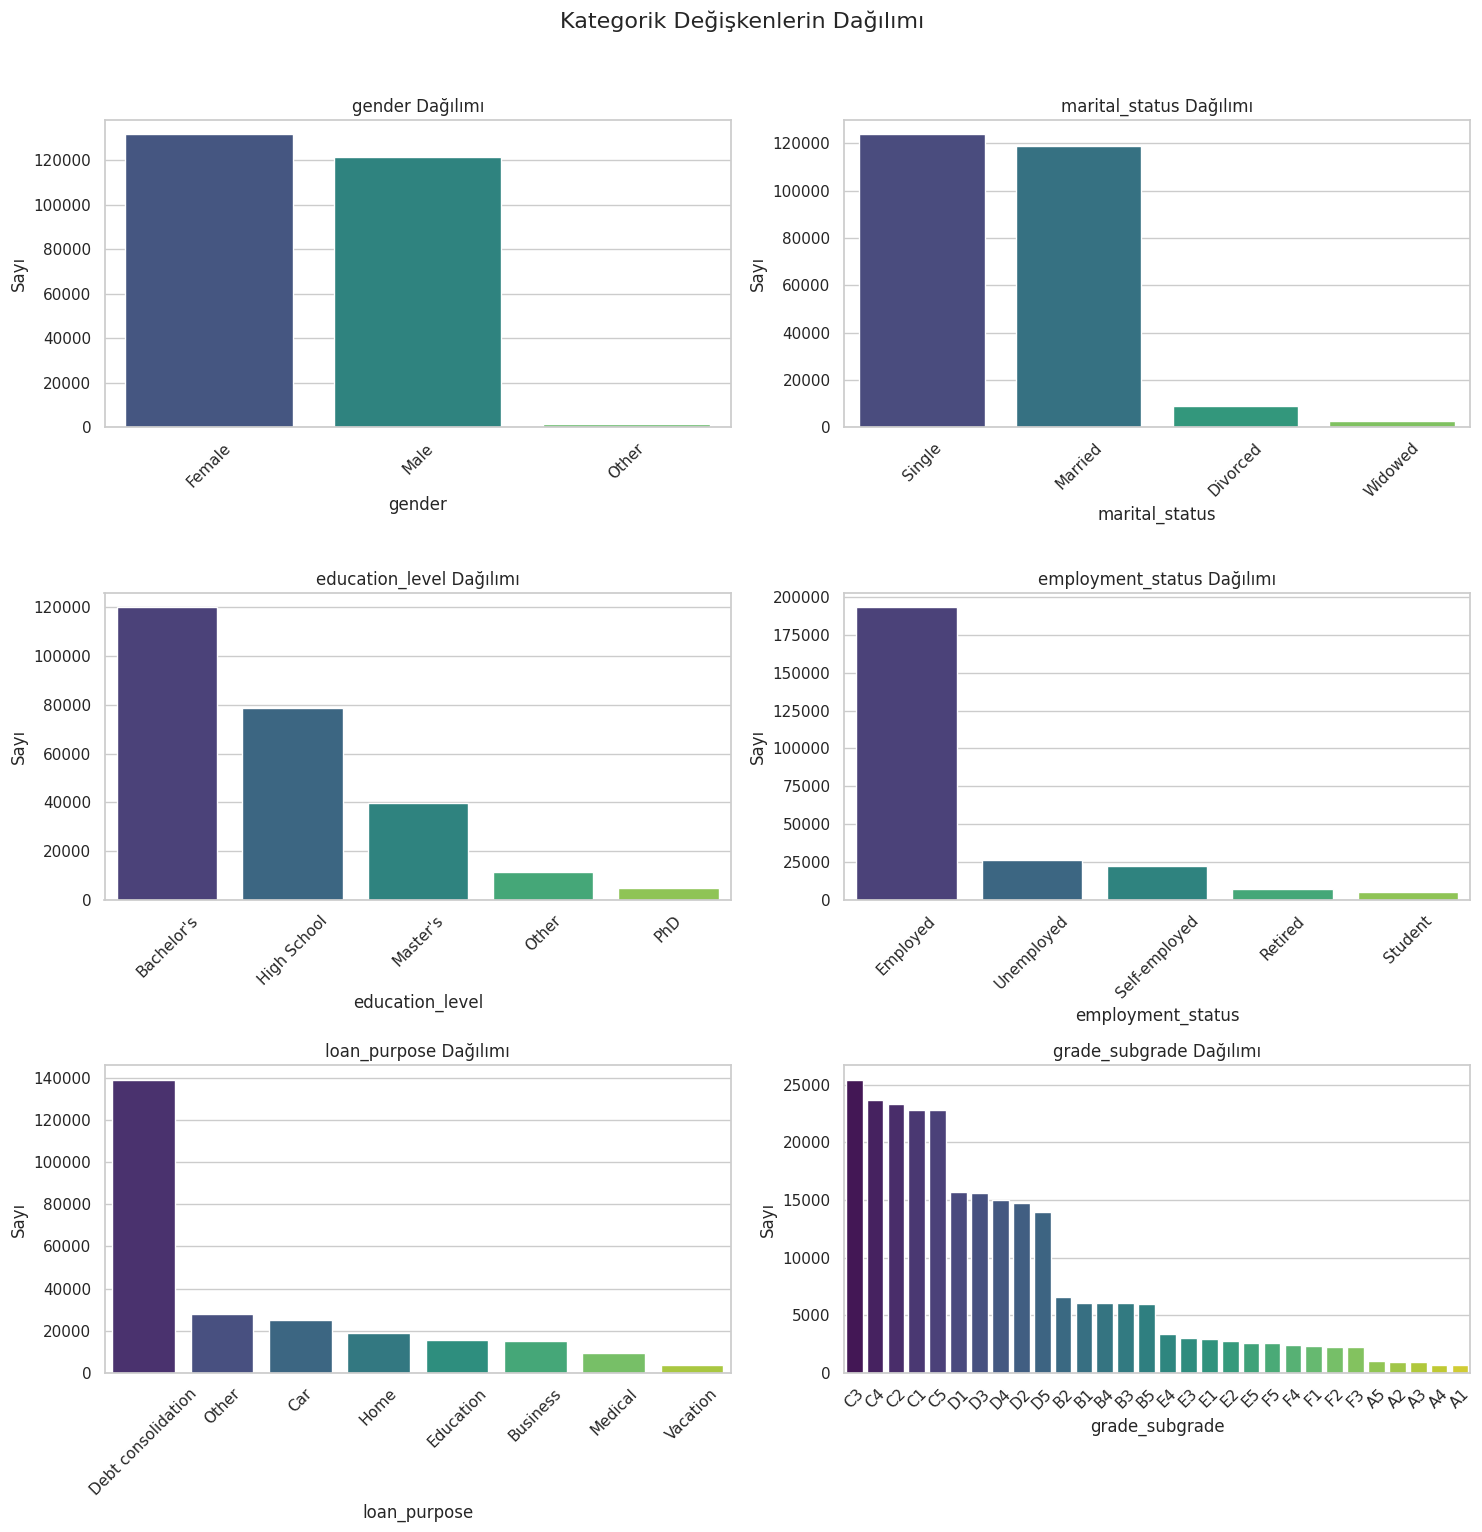

In [49]:
visualize_distributions(df_test)

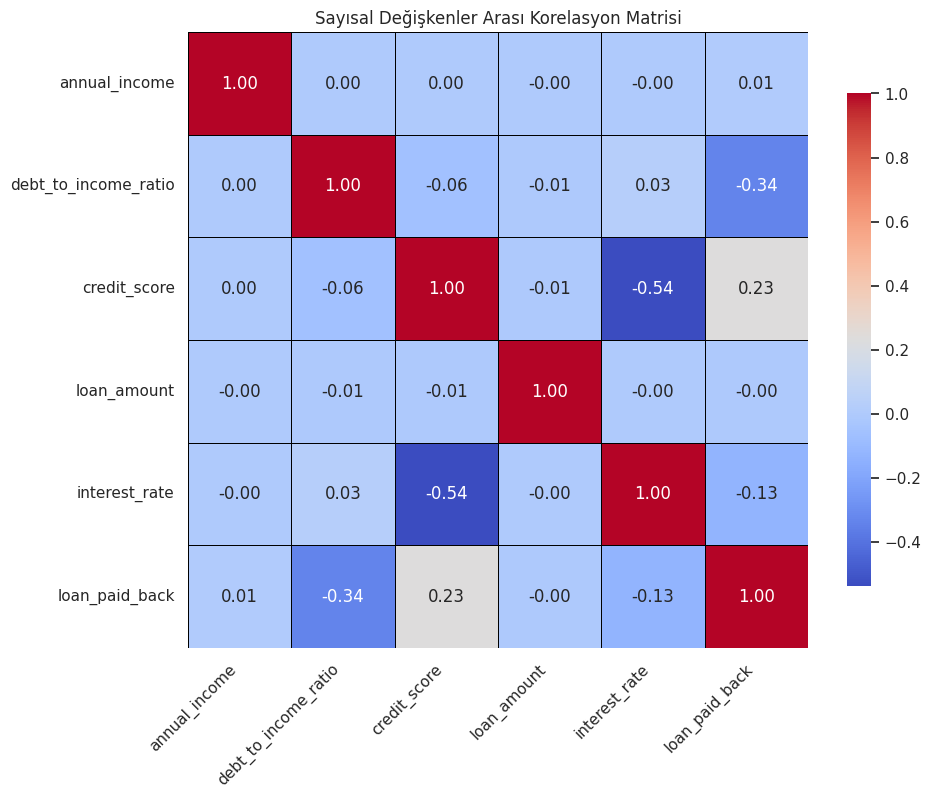

In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sizin kullandığınız sayısal sütunlar (hedef değişken dahil)
numeric_cols = ['annual_income', 'debt_to_income_ratio', 'credit_score', 
                'loan_amount', 'interest_rate', 'loan_paid_back']

# Korelasyon matrisini hesapla
correlation_matrix = df_train[numeric_cols].corr()

# Isı haritasını görselleştir
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, 
            annot=True, 
            fmt=".2f", 
            cmap='coolwarm', 
            linewidths=.5, 
            linecolor='black',
            cbar_kws={'shrink': 0.8})
plt.title('Sayısal Değişkenler Arası Korelasyon Matrisi')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()

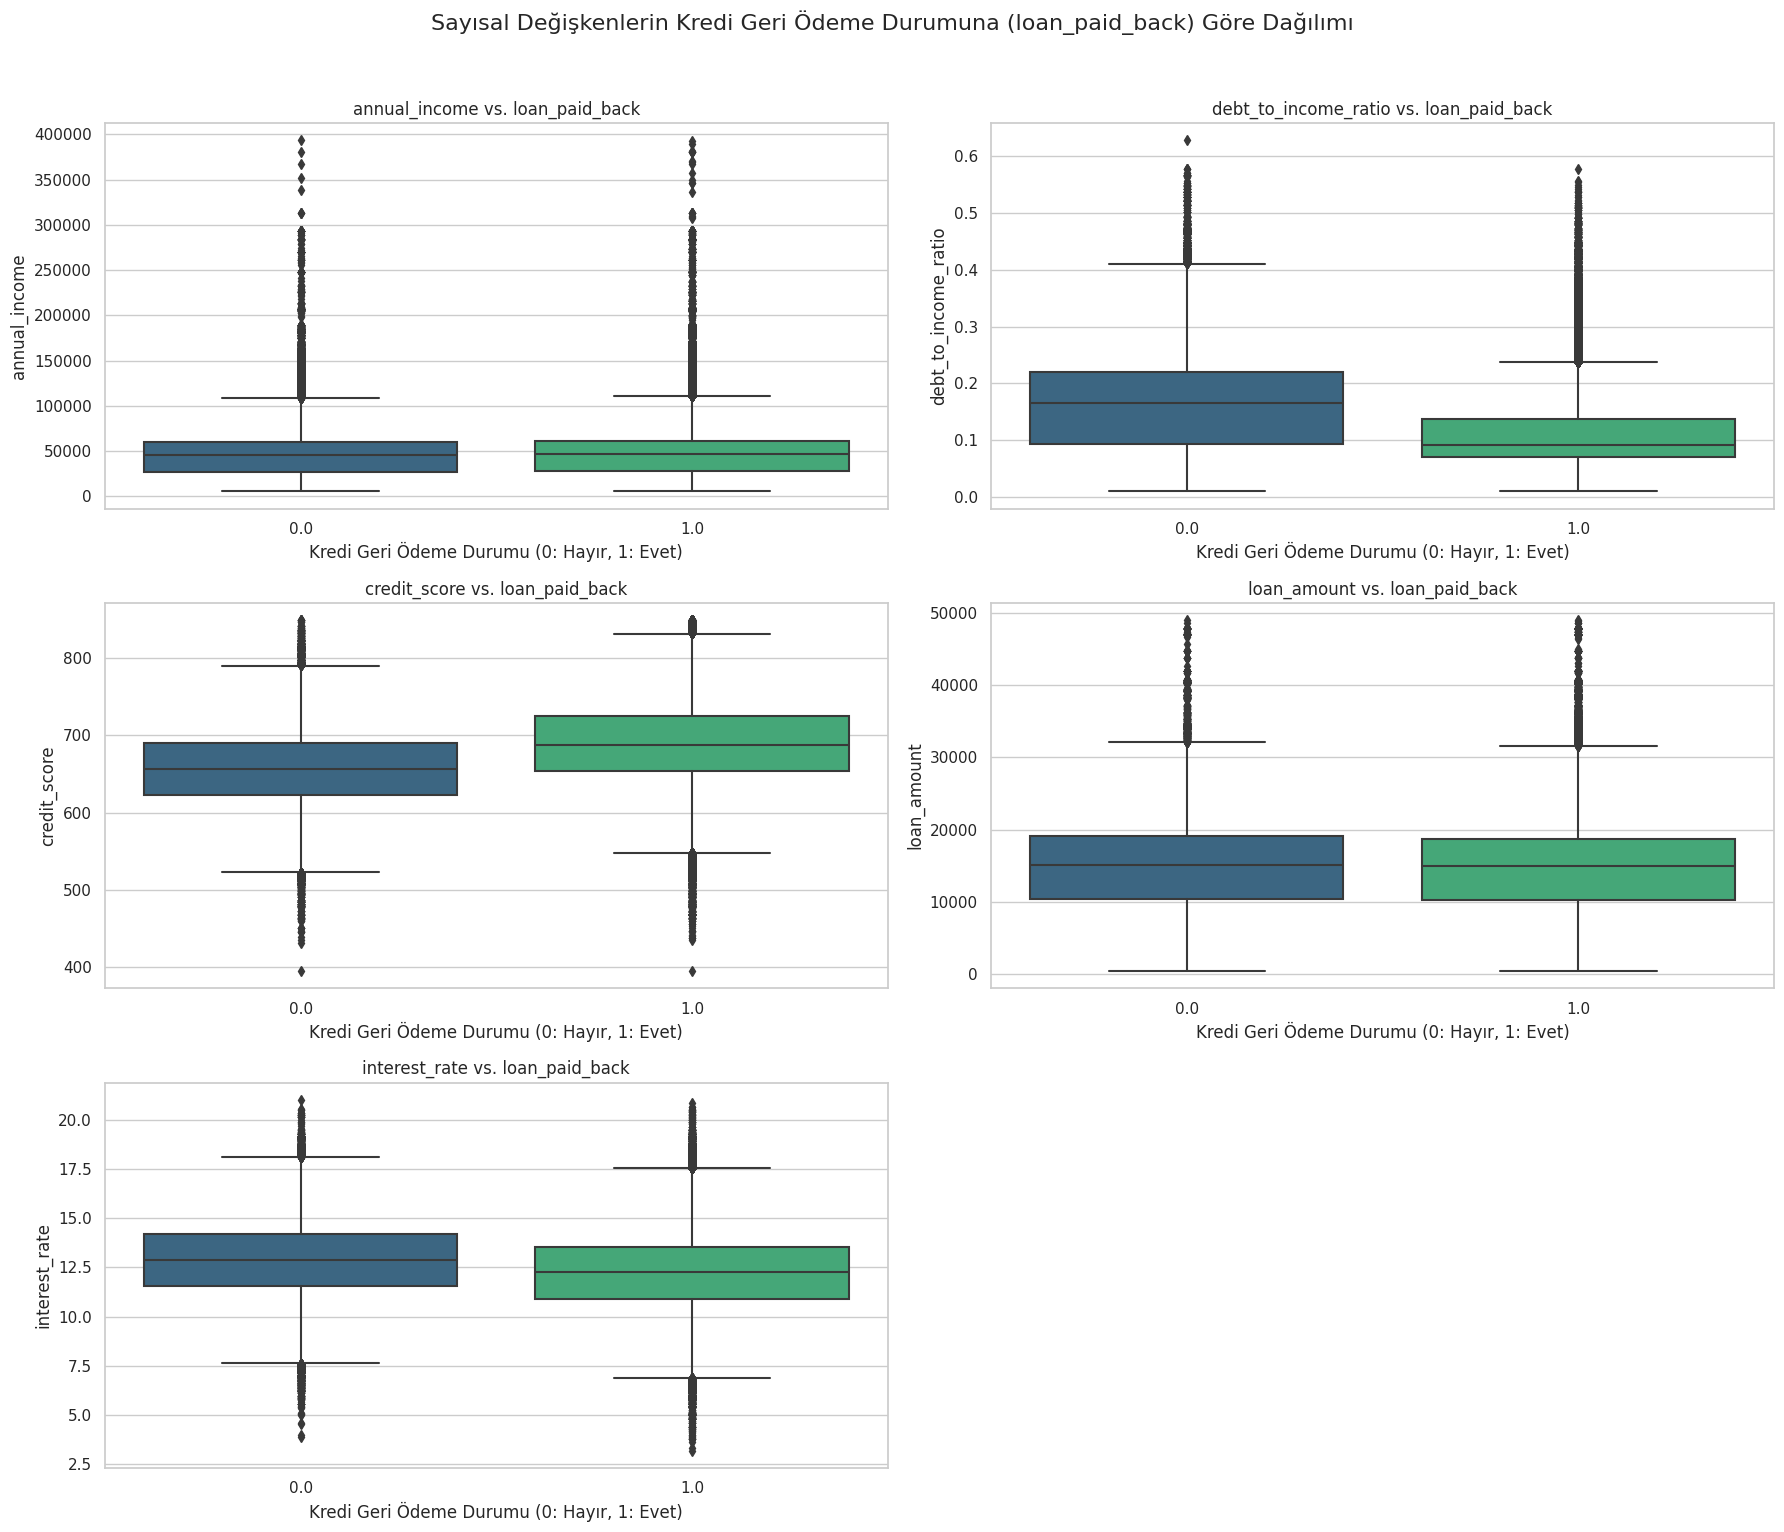

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt
import math

# 'id' ve 'loan_paid_back' hariç tüm sayısal sütunlar
numeric_cols = ['annual_income', 'debt_to_income_ratio', 'credit_score', 'loan_amount', 'interest_rate']

# Subplot yapısını kurma
n_cols = 2
n_rows = math.ceil(len(numeric_cols) / n_cols)

plt.figure(figsize=(18, 5 * n_rows))
plt.suptitle('Sayısal Değişkenlerin Kredi Geri Ödeme Durumuna (loan_paid_back) Göre Dağılımı', fontsize=16, y=1.02)

for i, col in enumerate(numeric_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    
    # Box Plot kullanarak dağılımı hedef değişkene göre ayırma
    sns.boxplot(x='loan_paid_back', y=col, data=df_train, palette='viridis')
    
    plt.title(f'{col} vs. loan_paid_back')
    plt.xlabel('Kredi Geri Ödeme Durumu (0: Hayır, 1: Evet)')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

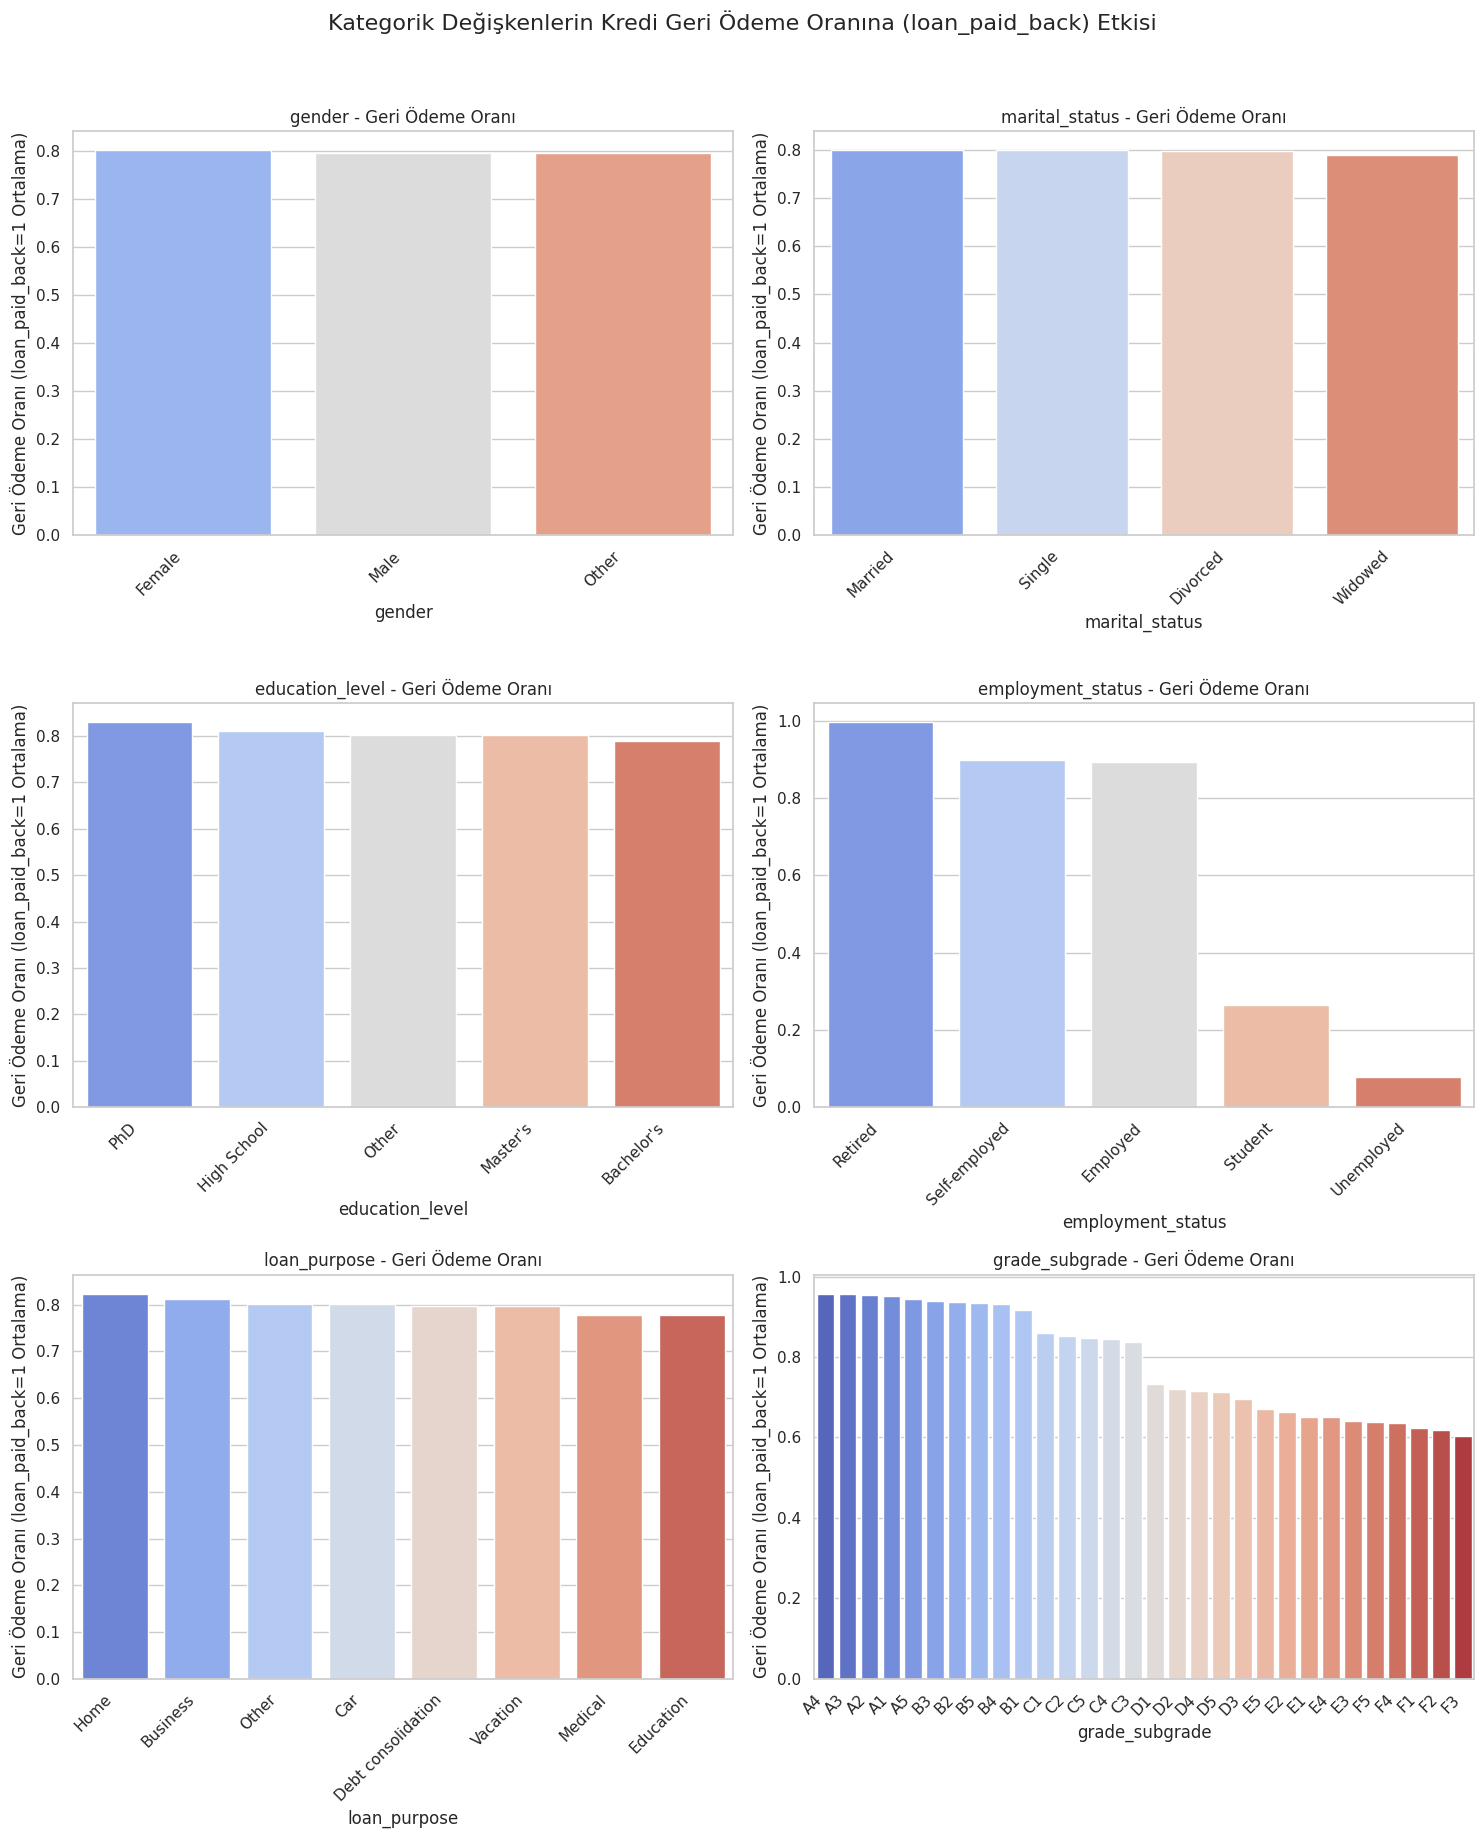

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import math

categorical_cols = ['gender', 'marital_status', 'education_level', 'employment_status', 'loan_purpose', 'grade_subgrade']

# Subplot yapısını kurma (Örneğin 2 sütunlu düzen)
n_cols = 2
n_rows = math.ceil(len(categorical_cols) / n_cols)

plt.figure(figsize=(15, 6 * n_rows))
plt.suptitle('Kategorik Değişkenlerin Kredi Geri Ödeme Oranına (loan_paid_back) Etkisi', fontsize=16, y=1.02)

for i, col in enumerate(categorical_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    
    # Her kategori için geri ödeme oranlarını hesapla (loan_paid_back=1 ortalaması)
    target_proportions = df_train.groupby(col)['loan_paid_back'].mean().sort_values(ascending=False).reset_index()
    
    # Oran Grafiği (Proportion Plot)
    sns.barplot(x=col, y='loan_paid_back', data=target_proportions, palette='coolwarm')
    
    plt.title(f'{col} - Geri Ödeme Oranı')
    plt.xlabel(col)
    plt.ylabel('Geri Ödeme Oranı (loan_paid_back=1 Ortalama)')
    plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()